In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the train poly and test poly datasets 
train = pd.read_csv("../datasets/train_and_poly_3.csv", low_memory=False)
test = pd.read_csv("../datasets/test_and_poly_3.csv", low_memory=False)

In [3]:
train.drop(columns="Unnamed: 0", inplace=True)
train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage_x,lot_area_x,street,alley,lot_shape,land_contour,...,garage_cars^2,garage_cars garage_area,garage_cars wood_deck_sf,garage_cars open_porch_sf,garage_area^2,garage_area wood_deck_sf,garage_area open_porch_sf,wood_deck_sf^2,wood_deck_sf open_porch_sf,open_porch_sf^2
0,109,533352170,60,RL,68.0,13517,Pave,Missing,IR1,Lvl,...,4.0,950.0,0.0,88.0,225625.0,0.0,20900.0,0.0,0.0,1936.0
1,544,531379050,60,RL,43.0,11492,Pave,Missing,IR1,Lvl,...,4.0,1118.0,0.0,148.0,312481.0,0.0,41366.0,0.0,0.0,5476.0
2,153,535304180,20,RL,68.0,7922,Pave,Missing,Reg,Lvl,...,1.0,246.0,0.0,52.0,60516.0,0.0,12792.0,0.0,0.0,2704.0
3,318,916386060,60,RL,73.0,9802,Pave,Missing,Reg,Lvl,...,4.0,800.0,200.0,0.0,160000.0,40000.0,0.0,10000.0,0.0,0.0
4,255,906425045,50,RL,82.0,14235,Pave,Missing,IR1,Lvl,...,4.0,968.0,0.0,118.0,234256.0,0.0,28556.0,0.0,0.0,3481.0


In [4]:
test.drop(columns="Unnamed: 0", inplace=True)
test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage_x,lot_area_x,street,alley,lot_shape,land_contour,...,garage_cars^2,garage_cars garage_area,garage_cars wood_deck_sf,garage_cars open_porch_sf,garage_area^2,garage_area wood_deck_sf,garage_area open_porch_sf,wood_deck_sf^2,wood_deck_sf open_porch_sf,open_porch_sf^2
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,1.0,440.0,0.0,60.0,193600.0,0.0,26400.0,0.0,0.0,3600.0
1,2718,905108090,90,RL,68.0,9662,Pave,Missing,IR1,Lvl,...,4.0,1160.0,340.0,0.0,336400.0,98600.0,0.0,28900.0,0.0,0.0
2,2414,528218130,60,RL,58.0,17104,Pave,Missing,IR1,Lvl,...,4.0,852.0,200.0,48.0,181476.0,42600.0,10224.0,10000.0,2400.0,576.0
3,1989,902207150,30,RM,60.0,8520,Pave,Missing,Reg,Lvl,...,4.0,960.0,0.0,0.0,230400.0,0.0,0.0,0.0,0.0,0.0
4,625,535105100,20,RL,68.0,9500,Pave,Missing,IR1,Lvl,...,4.0,1028.0,0.0,152.0,264196.0,0.0,39064.0,0.0,0.0,5776.0


In [5]:
categorical_cols = [col for col in train.columns if train[col].dtype == "object"]
train_no_cats = train.drop(columns = categorical_cols)

In [6]:
test_no_cats = test.drop(columns = categorical_cols)

In [7]:
features_train = list(train_no_cats.drop(columns = ["id", "pid", "ms_subclass", "overall_qual", "overall_cond", "exter_qual", 
                             "exter_cond", "bsmt_qual", "bsmt_cond", "bsmtfin_sf_2", "bsmt_unf_sf", "low_qual_fin_sf",
                             "bsmt_half_bath", "bedroom_abvgr", "kitchen_abvgr", "kitchen_qual", "fireplace_qu", 
                             "garage_qual", "garage_cond", "enclosed_porch", "3ssn_porch", "screen_porch", 
                             "pool_area", "pool_qc", "misc_val", "mo_sold", "yr_sold", "overall_combined", 
                             "garage_overall", "bsmt_overall", "saleprice"]).columns )

In [8]:
features_test = list(test_no_cats.drop(columns = ["id", "pid", "ms_subclass", "overall_qual", "overall_cond", "exter_qual", 
                             "exter_cond", "bsmt_qual", "bsmt_cond", "bsmtfin_sf_2", "bsmt_unf_sf", "low_qual_fin_sf",
                             "bsmt_half_bath", "bedroom_abvgr", "kitchen_abvgr", "kitchen_qual", "fireplace_qu", 
                             "garage_qual", "garage_cond", "enclosed_porch", "3ssn_porch", "screen_porch", 
                             "pool_area", "pool_qc", "misc_val", "mo_sold", "yr_sold", "overall_combined", 
                             "garage_overall", "bsmt_overall"]).columns )

In [9]:
train.dtypes

id                              int64
pid                             int64
ms_subclass                     int64
ms_zoning                      object
lot_frontage_x                float64
                               ...   
garage_area wood_deck_sf      float64
garage_area open_porch_sf     float64
wood_deck_sf^2                float64
wood_deck_sf open_porch_sf    float64
open_porch_sf^2               float64
Length: 274, dtype: object

In [10]:
X_train = train[features_train]
y_train = train["saleprice"]

X_train.shape
# print('X: ', X_train.shape)
# print('y: ', y_shape.shape)

(2051, 211)

In [11]:
X_train.isnull().sum().sum()

0

In [12]:
# Instantiate the model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [13]:
#Fit the model
model.fit(X_train, y_train)

LinearRegression()

In [14]:
model.score(X_train, y_train)

0.9320485955822276

In [15]:
cross_val_score(model, X_train, y_train).mean()

0.832360974912504

In [16]:
X_test = test[features_test]
preds = model.predict(X_test)

In [17]:
test["saleprice"] = preds

In [18]:
test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage_x,lot_area_x,street,alley,lot_shape,land_contour,...,garage_cars garage_area,garage_cars wood_deck_sf,garage_cars open_porch_sf,garage_area^2,garage_area wood_deck_sf,garage_area open_porch_sf,wood_deck_sf^2,wood_deck_sf open_porch_sf,open_porch_sf^2,saleprice
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,440.0,0.0,60.0,193600.0,0.0,26400.0,0.0,0.0,3600.0,132278.078335
1,2718,905108090,90,RL,68.0,9662,Pave,Missing,IR1,Lvl,...,1160.0,340.0,0.0,336400.0,98600.0,0.0,28900.0,0.0,0.0,175265.145345
2,2414,528218130,60,RL,58.0,17104,Pave,Missing,IR1,Lvl,...,852.0,200.0,48.0,181476.0,42600.0,10224.0,10000.0,2400.0,576.0,181692.593311
3,1989,902207150,30,RM,60.0,8520,Pave,Missing,Reg,Lvl,...,960.0,0.0,0.0,230400.0,0.0,0.0,0.0,0.0,0.0,105850.126747
4,625,535105100,20,RL,68.0,9500,Pave,Missing,IR1,Lvl,...,1028.0,0.0,152.0,264196.0,0.0,39064.0,0.0,0.0,5776.0,183428.944835


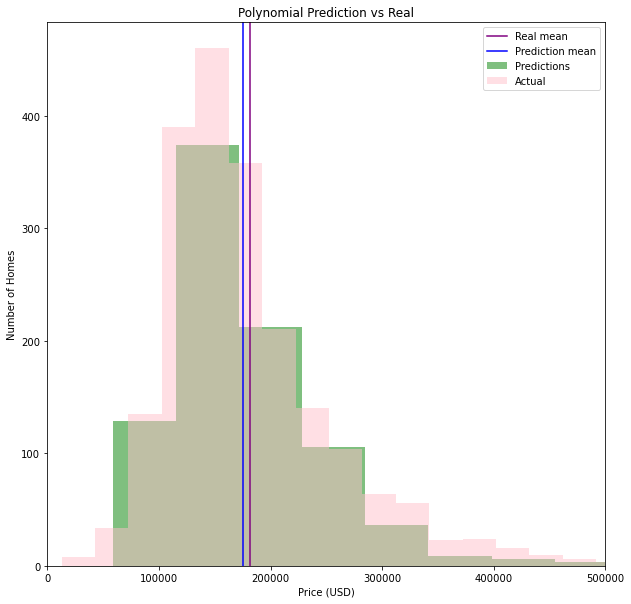

In [19]:
plt.figure(figsize=(10,10))
plt.hist(preds, color="green", alpha=0.5, bins=20, label="Predictions")
plt.hist(y_train, color="pink", alpha=0.5, bins=20, label="Actual")
plt.xlim(0, 500_000)
# plt.yscale("log")
plt.xlabel("Price (USD)")
plt.ylabel("Number of Homes")
plt.title("Polynomial Prediction vs Real")
plt.axvline(y_train.mean(), color="purple", label="Real mean")
plt.axvline(preds.mean(), color="blue", label="Prediction mean")
plt.legend()
plt.savefig("Polynomial Predictions vs Real Value", bbox_inches="tight");

In [20]:
y_train.mean() - preds.mean()

5689.648640586558

In [21]:
kaggle = test[["id", "saleprice"]]

In [22]:
kaggle.to_csv('../datasets/kaggle_mlr_poly.csv', index=False)

# Lasso Section

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV


In [24]:
sc = StandardScaler()
sc.fit(X_train)
Z_train = sc.transform(X_train)
Z_test = sc.transform(X_test)

In [25]:
print(f'Z_train shape is: {Z_train.shape}')
print(f'y_train shape is: {y_train.shape}')
print(f'Z_test shape is: {Z_test.shape}')


Z_train shape is: (2051, 211)
y_train shape is: (2051,)
Z_test shape is: (878, 211)


In [26]:
ols = LinearRegression()
ols.fit(Z_train, y_train)

LinearRegression()

In [27]:
ols.score(Z_train, y_train)

0.9320473966650137

In [28]:
cross_val_score(ols, Z_train, y_train).mean()

0.8323853736851229

In [30]:
(ols.coef_ **2).sum() #Ridge

2.5849873717738385e+33

In [31]:
np.abs(ols.coef_).sum() #Lasso

7.1902536433153976e+16

In [32]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3, 0, 100)
lasso = LassoCV(alphas=l_alphas, cv=5)
# Cross-validate over our list of Lasso alphas.
lasso.fit(Z_train, y_train)
# Fit model using best ridge alpha!

/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 310003016408.69025, tolerance: 1026891063.9887587
  model = cd_fast.enet_coordinate_descent_gram(
/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 308097813348.069, tolerance: 1026891063.9887587
  model = cd_fast.enet_coordinate_descent_gram(
/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 302958590813.23285, tolerance: 1026891063.9887587
  model = cd_fast.enet_coordinate_descent_gram(
/Users/robertherndon/opt/anaco

/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 322431171198.37195, tolerance: 1026891063.9887587
  model = cd_fast.enet_coordinate_descent_gram(
/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 322684146901.70233, tolerance: 1026891063.9887587
  model = cd_fast.enet_coordinate_descent_gram(
/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 322914635243.34937, tolerance: 1026891063.9887587
  model = cd_fast.enet_coordinate_descent_gram(
/Users/robertherndon/opt/ana

/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324783566050.2591, tolerance: 1026891063.9887587
  model = cd_fast.enet_coordinate_descent_gram(
/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324770834549.5607, tolerance: 1026891063.9887587
  model = cd_fast.enet_coordinate_descent_gram(
/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324756237077.3934, tolerance: 1026891063.9887587
  model = cd_fast.enet_coordinate_descent_gram(
/Users/robertherndon/opt/anacon

/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 323949129646.0344, tolerance: 1026891063.9887587
  model = cd_fast.enet_coordinate_descent_gram(
/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 323919226084.08167, tolerance: 1026891063.9887587
  model = cd_fast.enet_coordinate_descent_gram(
/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331259153033.1705, tolerance: 1043538609.9556501
  model = cd_fast.enet_coordinate_descent_gram(
/Users/robertherndon/opt/anaco

/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 340296928798.83325, tolerance: 1043538609.9556501
  model = cd_fast.enet_coordinate_descent_gram(
/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 341042800954.8444, tolerance: 1043538609.9556501
  model = cd_fast.enet_coordinate_descent_gram(
/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 341722152168.3945, tolerance: 1043538609.9556501
  model = cd_fast.enet_coordinate_descent_gram(
/Users/robertherndon/opt/anaco

/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 350109319722.5861, tolerance: 1043538609.9556501
  model = cd_fast.enet_coordinate_descent_gram(
/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 350185238738.96265, tolerance: 1043538609.9556501
  model = cd_fast.enet_coordinate_descent_gram(
/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 350253048730.48444, tolerance: 1043538609.9556501
  model = cd_fast.enet_coordinate_descent_gram(
/Users/robertherndon/opt/anac

/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 350369484462.47876, tolerance: 1043538609.9556501
  model = cd_fast.enet_coordinate_descent_gram(
/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 350347097252.0518, tolerance: 1043538609.9556501
  model = cd_fast.enet_coordinate_descent_gram(
/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 350324303065.0589, tolerance: 1043538609.9556501
  model = cd_fast.enet_coordinate_descent_gram(
/Users/robertherndon/opt/anaco

/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324758112644.1554, tolerance: 1024127411.0469205
  model = cd_fast.enet_coordinate_descent_gram(
/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 325992100167.40356, tolerance: 1024127411.0469205
  model = cd_fast.enet_coordinate_descent_gram(
/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 327116974576.49567, tolerance: 1024127411.0469205
  model = cd_fast.enet_coordinate_descent_gram(
/Users/robertherndon/opt/anac

/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 337587543056.0156, tolerance: 1024127411.0469205
  model = cd_fast.enet_coordinate_descent_gram(
/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 337608555427.2428, tolerance: 1024127411.0469205
  model = cd_fast.enet_coordinate_descent_gram(
/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 337624422951.51044, tolerance: 1024127411.0469205
  model = cd_fast.enet_coordinate_descent_gram(
/Users/robertherndon/opt/anaco

/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 336781489082.56635, tolerance: 1024127411.0469205
  model = cd_fast.enet_coordinate_descent_gram(
/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 336736202910.96234, tolerance: 1024127411.0469205
  model = cd_fast.enet_coordinate_descent_gram(
/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 336690946038.8935, tolerance: 1024127411.0469205
  model = cd_fast.enet_coordinate_descent_gram(
/Users/robertherndon/opt/anac

/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 337264638318.4668, tolerance: 1053788072.0385876
  model = cd_fast.enet_coordinate_descent_gram(
/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 337940054741.4332, tolerance: 1053788072.0385876
  model = cd_fast.enet_coordinate_descent_gram(
/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 338555128110.57043, tolerance: 1053788072.0385876
  model = cd_fast.enet_coordinate_descent_gram(
/Users/robertherndon/opt/anaco

/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 343567162674.39575, tolerance: 1053788072.0385876
  model = cd_fast.enet_coordinate_descent_gram(
/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 343546884053.2912, tolerance: 1053788072.0385876
  model = cd_fast.enet_coordinate_descent_gram(
/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 343524205833.5959, tolerance: 1053788072.0385876
  model = cd_fast.enet_coordinate_descent_gram(
/Users/robertherndon/opt/anaco

/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 293139235929.06024, tolerance: 1002395997.5469403
  model = cd_fast.enet_coordinate_descent_gram(
/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 294583960124.99036, tolerance: 1002395997.5469403
  model = cd_fast.enet_coordinate_descent_gram(
/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295845040259.6933, tolerance: 1002395997.5469403
  model = cd_fast.enet_coordinate_descent_gram(
/Users/robertherndon/opt/anac

/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 319838687185.2267, tolerance: 1002395997.5469403
  model = cd_fast.enet_coordinate_descent_gram(
/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 320236149345.63025, tolerance: 1002395997.5469403
  model = cd_fast.enet_coordinate_descent_gram(
/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 320604772549.778, tolerance: 1002395997.5469403
  model = cd_fast.enet_coordinate_descent_gram(
/Users/robertherndon/opt/anacon

/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324336180842.3126, tolerance: 1002395997.5469403
  model = cd_fast.enet_coordinate_descent_gram(
/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324343384009.6337, tolerance: 1002395997.5469403
  model = cd_fast.enet_coordinate_descent_gram(
/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324347911194.2181, tolerance: 1002395997.5469403
  model = cd_fast.enet_coordinate_descent_gram(
/Users/robertherndon/opt/anacon

/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 426044992274.9483, tolerance: 1287796691.8785386
  model = cd_fast.enet_coordinate_descent(


LassoCV(alphas=array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,
       0.00572237, 0.00613591, 0.00657933, 0.0070548 , 0.00756463,
       0.008...
       0.09326033, 0.1       , 0.10722672, 0.1149757 , 0.12328467,
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475284,
       0.18738174, 0.2009233 , 0.21544347, 0.23101297, 0.24770764,
       0.26560878, 0.28480359, 0.30538555, 0.32745492, 0.35111917,
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ]),
        cv=5)

In [33]:
lasso.alpha_

1.0

In [34]:
l_alphas[[0,1]]

array([0.001     , 0.00107227])

In [35]:
lasso_coefs = pd.Series(lasso.coef_, index=features_train)
lasso_coefs.iloc[:]

lot_frontage_x                20243.858798
lot_area_x                    22328.295910
year_built_x                  27408.567286
year_remod/add_x               8310.790383
mas_vnr_area                   1564.202172
                                  ...     
garage_area wood_deck_sf      -3697.870363
garage_area open_porch_sf      1891.089209
wood_deck_sf^2                  995.449119
wood_deck_sf open_porch_sf     -887.948561
open_porch_sf^2                -624.194741
Length: 211, dtype: float64

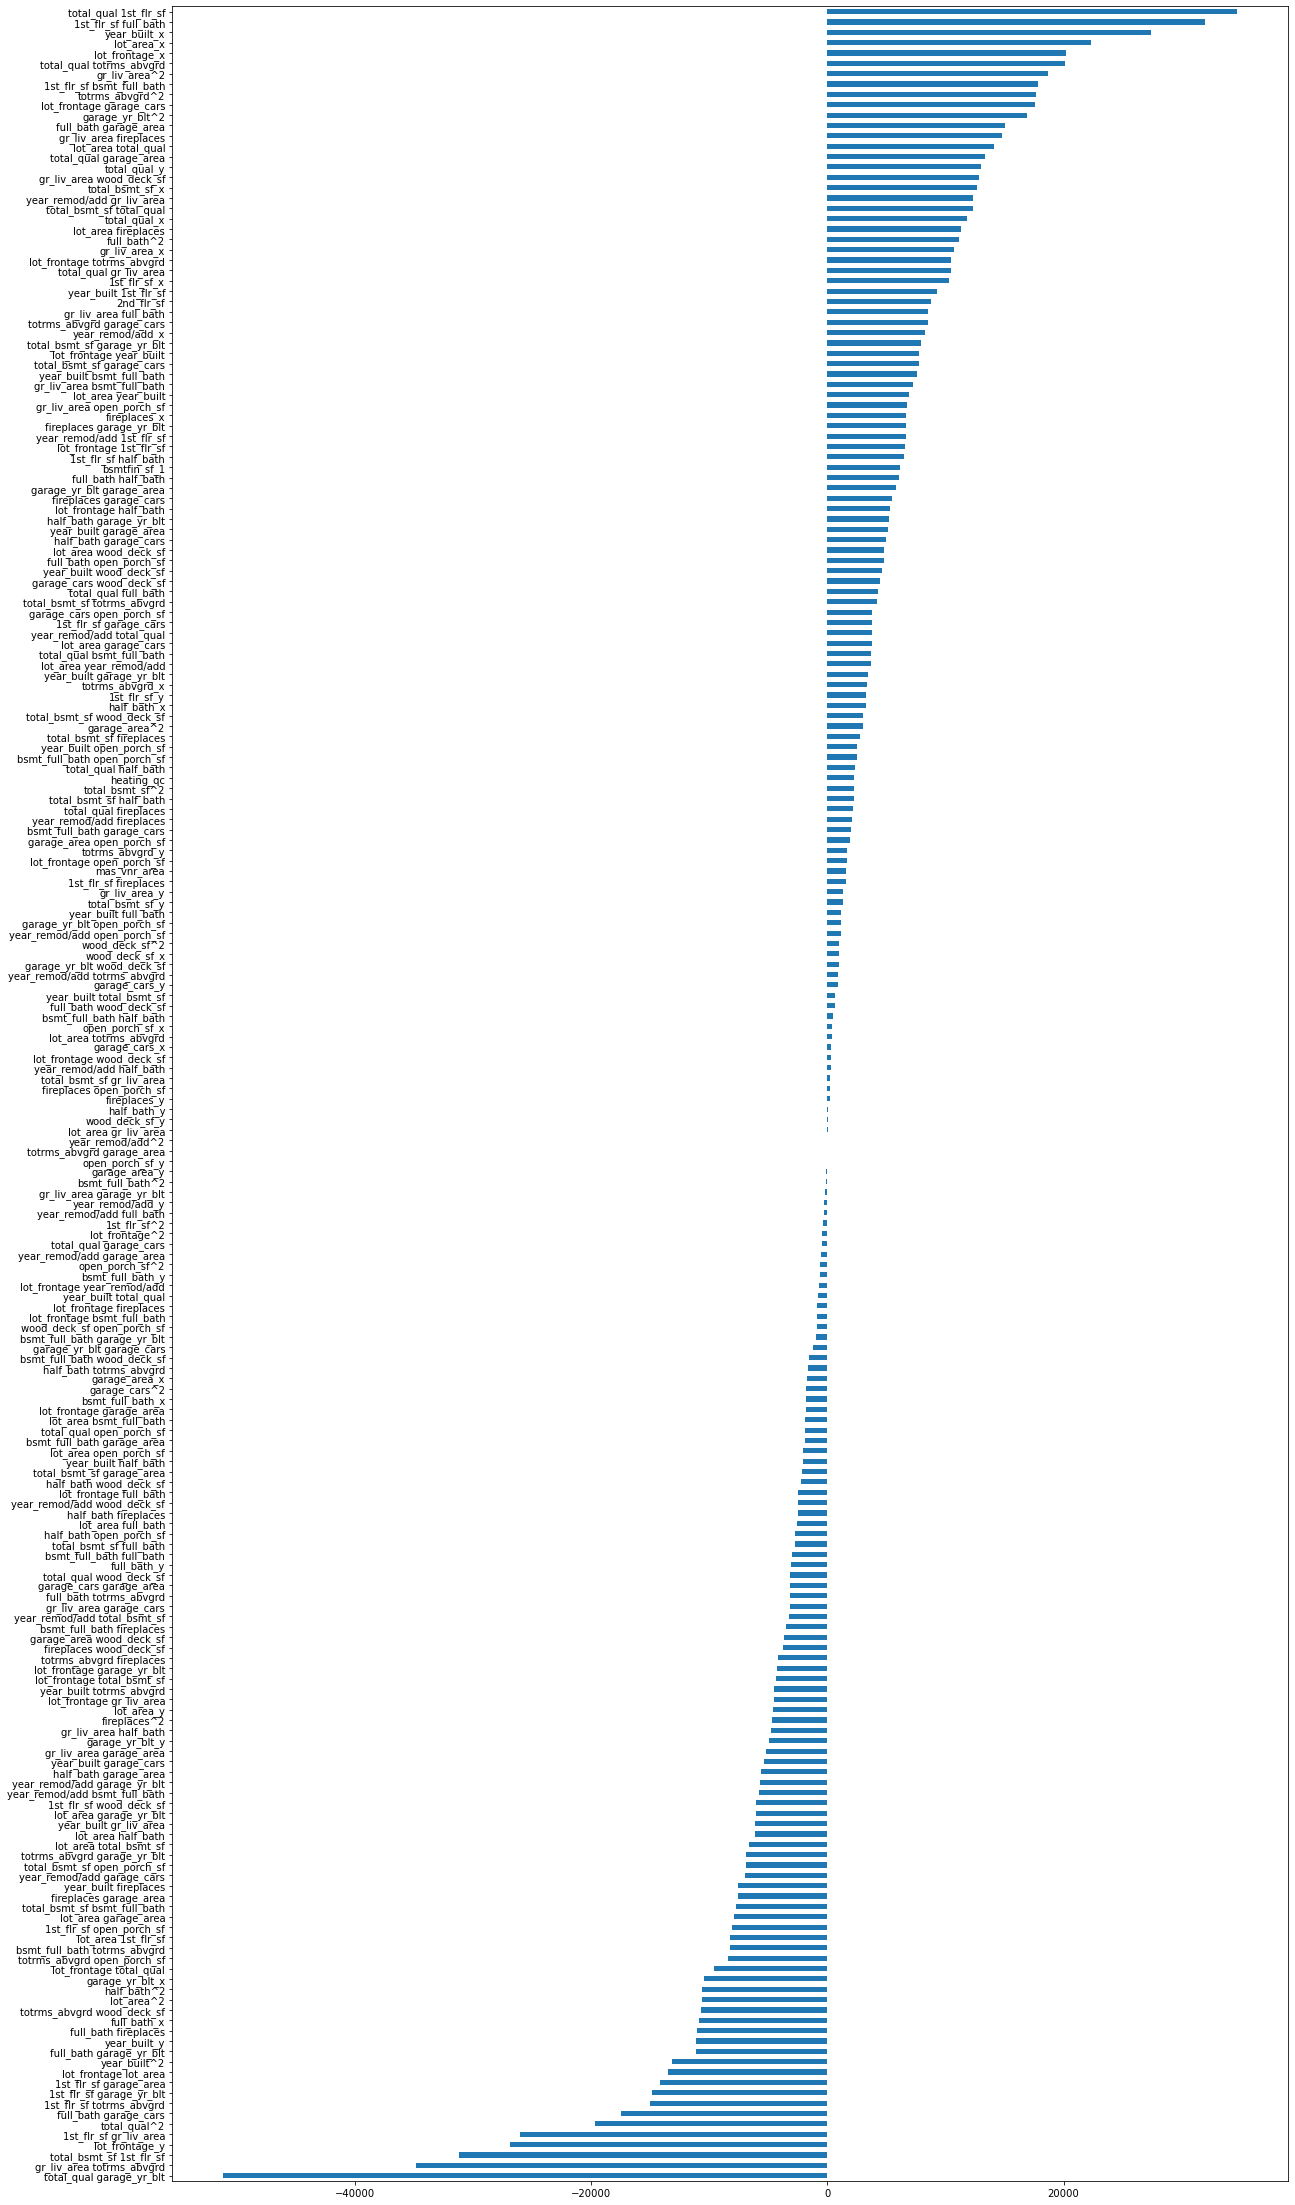

In [36]:
plt.figure(figsize=(20, 40))
lasso_coefs[lasso_coefs != 0].sort_values().plot.barh();

In [37]:
top_coef = pd.Series(abs(lasso.coef_), index=features_train).sort_values(ascending=False)[:10]
#lasso_features = [feature for feature in lasso_coefs.index if any(lasso_coefs.index > str(0))] *From Mona

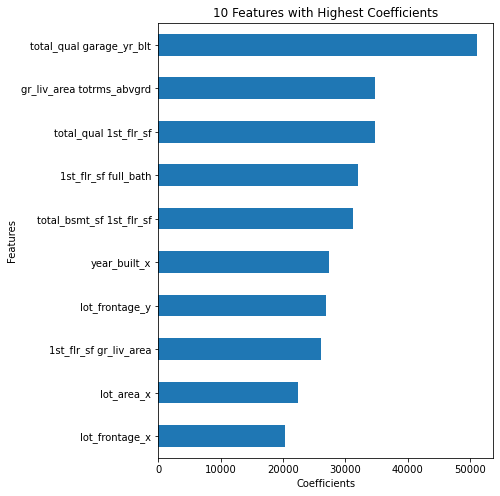

In [38]:
plt.figure(figsize = (6,8))
plt.xlabel('Coefficients')
plt.ylabel('Features')
plt.title('10 Features with Highest Coefficients')
top_coef.sort_values().plot.barh();
plt.savefig("Largest Coefficients", bbox_inches="tight")

In [39]:
# Checking if the top_coefficient is same as the list comprehension below
top_coef

total_qual garage_yr_blt     51154.940398
gr_liv_area totrms_abvgrd    34802.718020
total_qual 1st_flr_sf        34717.417161
1st_flr_sf full_bath         31992.149250
total_bsmt_sf 1st_flr_sf     31179.914753
year_built_x                 27408.567286
lot_frontage_y               26898.156453
1st_flr_sf gr_liv_area       26040.658441
lot_area_x                   22328.295910
lot_frontage_x               20243.858798
dtype: float64

In [40]:
lasso_features = [feature for feature in top_coef.index] 

In [41]:
lasso_features

['total_qual garage_yr_blt',
 'gr_liv_area totrms_abvgrd',
 'total_qual 1st_flr_sf',
 '1st_flr_sf full_bath',
 'total_bsmt_sf 1st_flr_sf',
 'year_built_x',
 'lot_frontage_y',
 '1st_flr_sf gr_liv_area',
 'lot_area_x',
 'lot_frontage_x']

In [42]:
X_train_lasso = train[lasso_features]
X_train_lasso

,total_qual garage_yr_blt,gr_liv_area totrms_abvgrd,total_qual 1st_flr_sf,1st_flr_sf full_bath,total_bsmt_sf 1st_flr_sf,year_built_x,lot_frontage_y,1st_flr_sf gr_liv_area,lot_area_x,lot_frontage_x
0,1707264.0,8874.0,626400.0,1450.0,525625.0,1976,68.0,1072275.0,13517,68.0
1,2683968.0,16976.0,1227072.0,1826.0,833569.0,1996,43.0,1937386.0,11492,43.0
2,1054620.0,5285.0,570780.0,1057.0,1117249.0,1953,68.0,1117249.0,7922,68.0
3,1083780.0,10108.0,401760.0,1488.0,285696.0,2006,73.0,1074336.0,9802,73.0
4,634068.0,8670.0,269244.0,1662.0,561756.0,1900,82.0,1200795.0,14235,82.0
...,...,...,...,...,...,...,...,...,...,...
2046,3082752.0,12096.0,2654208.0,3456.0,3255552.0,2007,79.0,2985984.0,11449,79.0
2047,635364.0,3444.0,278964.0,861.0,741321.0,1940,68.0,741321.0,12342,68.0
2048,624996.0,17217.0,379728.0,1172.0,1050112.0,1928,57.0,2242036.0,7558,57.0
2049,633744.0,7200.0,388800.0,1200.0,1440000.0,1956,80.0,1440000.0,10400,80.0


In [47]:
y_train

0       130500
1       220000
2       109000
3       174000
4       138500
         ...  
2046    298751
2047     82500
2048    177000
2049    144000
2050    189000
Name: saleprice, Length: 2051, dtype: int64

In [45]:
lasso_model = LinearRegression()
lasso_model.fit(X_train_lasso, y_train)

LinearRegression()

In [49]:
lasso_model.score(X_train_lasso, y_train)

0.8098906029070465

In [48]:
cross_val_score(model, X_train_lasso, y_train).mean()

0.780585163070431

In [50]:
preds_lasso = model.predict(X_test)

In [51]:
test["saleprice"] = preds_lasso

In [52]:
test

,id,pid,ms_subclass,ms_zoning,lot_frontage_x,lot_area_x,street,alley,lot_shape,land_contour,...,garage_cars garage_area,garage_cars wood_deck_sf,garage_cars open_porch_sf,garage_area^2,garage_area wood_deck_sf,garage_area open_porch_sf,wood_deck_sf^2,wood_deck_sf open_porch_sf,open_porch_sf^2,saleprice
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,440.0,0.0,60.0,193600.0,0.0,26400.0,0.0,0.0,3600.0,132278.078335
1,2718,905108090,90,RL,68.0,9662,Pave,Missing,IR1,Lvl,...,1160.0,340.0,0.0,336400.0,98600.0,0.0,28900.0,0.0,0.0,175265.145345
2,2414,528218130,60,RL,58.0,17104,Pave,Missing,IR1,Lvl,...,852.0,200.0,48.0,181476.0,42600.0,10224.0,10000.0,2400.0,576.0,181692.593311
3,1989,902207150,30,RM,60.0,8520,Pave,Missing,Reg,Lvl,...,960.0,0.0,0.0,230400.0,0.0,0.0,0.0,0.0,0.0,105850.126747
4,625,535105100,20,RL,68.0,9500,Pave,Missing,IR1,Lvl,...,1028.0,0.0,152.0,264196.0,0.0,39064.0,0.0,0.0,5776.0,183428.944835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,1662,527377110,60,RL,80.0,8000,Pave,Missing,Reg,Lvl,...,976.0,0.0,192.0,238144.0,0.0,46848.0,0.0,0.0,9216.0,181522.899207
874,1234,535126140,60,RL,90.0,14670,Pave,Missing,Reg,Lvl,...,960.0,0.0,460.0,230400.0,0.0,110400.0,0.0,0.0,52900.0,233634.882954
875,1373,904100040,20,RL,55.0,8250,Pave,Missing,Reg,Lvl,...,322.0,0.0,63.0,103684.0,0.0,20286.0,0.0,0.0,3969.0,136263.608477
876,1672,527425140,20,RL,60.0,9000,Pave,Missing,Reg,Lvl,...,1056.0,0.0,0.0,278784.0,0.0,0.0,0.0,0.0,0.0,114946.791509


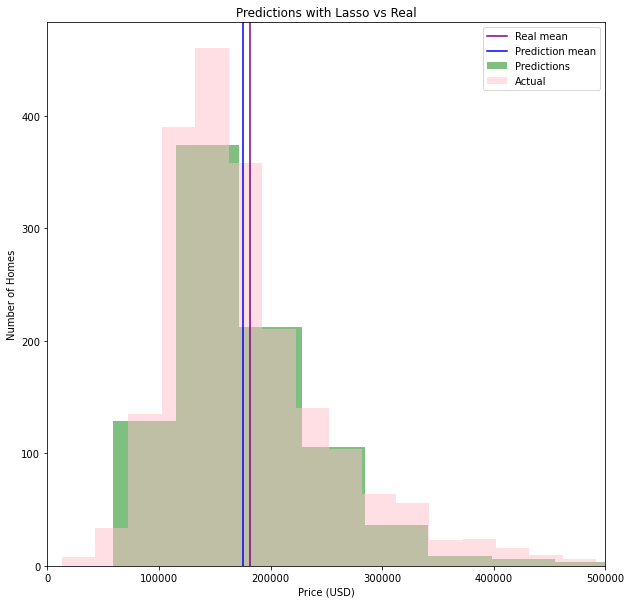

In [53]:
# plt.figure(figsize=(10,10))
# plt.hist(preds_lasso, color="green", bins=20)
# plt.xlim(0, 500_000)
# # plt.yscale("log")
# plt.axvline(y_train.mean(), color="purple")
# plt.show();
plt.figure(figsize=(10,10))
plt.hist(preds_lasso, color="green", alpha=0.5, bins=20, label="Predictions")
plt.hist(y_train, color="pink", alpha=0.5, bins=20, label="Actual")
plt.xlim(0, 500_000)
# plt.yscale("log")
plt.title("Predictions with Lasso vs Real")
plt.xlabel("Price (USD)")
plt.ylabel("Number of Homes")
plt.axvline(y_train.mean(), color="purple", label="Real mean")
plt.axvline(preds.mean(), color="blue", label="Prediction mean")
plt.legend()
plt.savefig("Lasso vs Real", bbox_inches="tight");

In [54]:
y_train.mean() - preds_lasso.mean()

5689.648640586558

In [ ]:
#kaggle = test[["id", "saleprice"]]
kaggle_lasso = test[["id", "saleprice"]]

In [ ]:
kaggle_lasso

In [ ]:
kaggle_lasso.to_csv("../datasets/kaggle_mlr_lasso2.csv", index=False)